Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Loading data

In [2]:
ds = pd.read_csv('student-scores.csv')
ds.shape
ds.head()
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


plot data points

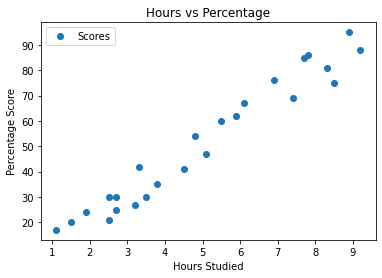

In [3]:
ds.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

preparing test data

In [6]:
X = ds.iloc[:, :-1].values
Y = ds.iloc[:, 1].values
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.2, random_state=0)

Preparing model and training

In [8]:
regressor = LinearRegression()
regressor.fit(trainX, trainY)
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


Prediction and checking prediction

In [11]:
predY = regressor.predict(testX)
df = pd.DataFrame({'Actual': testY, 'Predicted': predY})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, predY))
print('Mean Squared Error:', metrics.mean_squared_error(testY, predY))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, predY)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


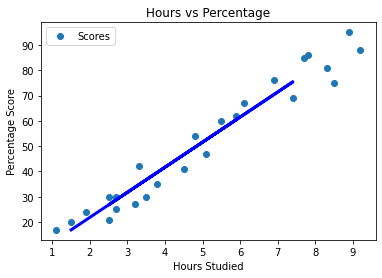

In [13]:
ds.plot(x='Hours', y='Scores', style='o')
plt.plot(testX, predY, color='blue', linewidth=3)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()